In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('malwares.csv')
df.head()

,appexception,apicall,codeinjection,dll-loaded,doc_summary,exploitcode,file,folder,heapspraying,hiddenproc,...,ave_maria,emotet,formbook,gozi,lokibot,nanocore,netsky,remcos,qakbot,autoit
0,0,7,0,0,8,0,93,22,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,75,17,0,16,21,219,18,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,41,8,2,2,8,105,6,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,78,17,0,16,21,218,18,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2,243,5,0,6,0,342,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Display all columns
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

df.nunique()

appexception                         12
apicall                             343
codeinjection                        60
dll-loaded                           15
doc_summary                          25
exploitcode                          31
file                                822
folder                               44
heapspraying                         12
hiddenproc                            2
malicious-alert                     112
mutex                                67
network                             232
process                             138
regkey                              233
thread                               38
wmiquery                             17
CheckRemoteDebuggerPresent            2
ClipboardFormatListener               4
ClipboardSequenceNumber              16
CLSIDFromString                      12
CryptAcquireContext                  34
EncryptMessage                        9
EnumWindows                           5
ExitProcess                           4


In [4]:
df.shape

(6811, 79)

In [5]:
df.describe().round()

,appexception,apicall,codeinjection,dll-loaded,doc_summary,exploitcode,file,folder,heapspraying,hiddenproc,malicious-alert,mutex,network,process,regkey,thread,wmiquery,CheckRemoteDebuggerPresent,ClipboardFormatListener,ClipboardSequenceNumber,CLSIDFromString,CryptAcquireContext,EncryptMessage,EnumWindows,ExitProcess,FindWindowEx,FindWindow,GetClipboardData,GetComputerName,GetComputerNameEx,GetDesktopWindow,GetForegroundWindow,GetLocalTime,GetSystemDefaultLangID,GetSystemDirectory,GetSystemTime,GetTokenInformation,GetVersionEx,GetVolumeNameForVolumeMountPoint,IcmpSendEcho,IsDebuggerPresent,MessageBox,NtAdjustPrivilegesToken,RegisterRawInputDevices,SetClipboardData,SetClipboardViewer,SetProcessDEPPolicy,SetTimer,SetWindowsHookEx,ShellExecute,Sleep,SleepEx,StartService,SystemTimeToFileTime,xls,doc,exe,xlsx,zip,xlsm,docx,xlsb,pif,scr,altra_estensione,agent_tesla,carrotbat,icedid,asyncrat,ave_maria,emotet,formbook,gozi,lokibot,nanocore,netsky,remcos,qakbot,autoit
count,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0
mean,3.0,69.0,11.0,1.0,5.0,6.0,459.0,10.0,2.0,0.0,53.0,7.0,62.0,23.0,52.0,5.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,1.0,0.0,7.0,1.0,6.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,14.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,6.0,69.0,117.0,2.0,4.0,8.0,892.0,7.0,3.0,0.0,17.0,12.0,282.0,78.0,48.0,11.0,2.0,0.0,0.0,3.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,4.0,2.0,3.0,1.0,8.0,4.0,4.0,10.0,2.0,5.0,0.0,8.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,17.0,33.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,19.0,0.0,0.0,2.0,0.0,77.0,4.0,0.0,0.0,44.0,0.0,4.0,7.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,50.0,5.0,0.0,6.0,8.0,242.0,8.0,0.0,0.0,52.0,3.0,10.0,14.0,53.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.0,88.0,10.0,0.0,8.0,10.0,658.0,16.0,3.0,0.0,59.0,10.0,17.0,26.0,63.0,6.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,3.0,0.0,0.0,0.0,13.0,2.0,9.0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21.0,7.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,24.0,589.0,2960.0,51.0,26.0,353.0,7981.0,72.0,20.0,3.0,124.0,302.0,3409.0,2375.0,712.0,76.0,25.0,1.0,5.0,19.0,67.0,57.0,20.0,84.0,21.0,2.0,10.0,26.0,20.0,28.0,20.0,85.0,42.0,135.0,103.0,20.0,45.0,5.0,83.0,118.0,9.0,4.0,8.0,4.0,35.0,6.0,4.0,21.0,44.0,4.0,210.0,287.0,3.0,144.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
column_names = df.columns
feature_col = column_names[:65]
result_col = column_names[65:]
result_col

Index(['agent_tesla', 'carrotbat', 'icedid', 'asyncrat', 'ave_maria', 'emotet',
       'formbook', 'gozi', 'lokibot', 'nanocore', 'netsky', 'remcos', 'qakbot',
       'autoit'],
      dtype='object')

In [7]:
df[result_col].sum()

agent_tesla     990
carrotbat       242
icedid          123
asyncrat          6
ave_maria        31
emotet           53
formbook       2488
gozi             48
lokibot        2027
nanocore         54
netsky          157
remcos          149
qakbot          428
autoit           15
dtype: int64

In [8]:
df['result'] = (df[result_col] == 1).idxmax(axis=1)
df.head()

,appexception,apicall,codeinjection,dll-loaded,doc_summary,exploitcode,file,folder,heapspraying,hiddenproc,malicious-alert,mutex,network,process,regkey,thread,wmiquery,CheckRemoteDebuggerPresent,ClipboardFormatListener,ClipboardSequenceNumber,CLSIDFromString,CryptAcquireContext,EncryptMessage,EnumWindows,ExitProcess,FindWindowEx,FindWindow,GetClipboardData,GetComputerName,GetComputerNameEx,GetDesktopWindow,GetForegroundWindow,GetLocalTime,GetSystemDefaultLangID,GetSystemDirectory,GetSystemTime,GetTokenInformation,GetVersionEx,GetVolumeNameForVolumeMountPoint,IcmpSendEcho,IsDebuggerPresent,MessageBox,NtAdjustPrivilegesToken,RegisterRawInputDevices,SetClipboardData,SetClipboardViewer,SetProcessDEPPolicy,SetTimer,SetWindowsHookEx,ShellExecute,Sleep,SleepEx,StartService,SystemTimeToFileTime,xls,doc,exe,xlsx,zip,xlsm,docx,xlsb,pif,scr,altra_estensione,agent_tesla,carrotbat,icedid,asyncrat,ave_maria,emotet,formbook,gozi,lokibot,nanocore,netsky,remcos,qakbot,autoit,result
0,0,7,0,0,8,0,93,22,0,0,50,0,12,32,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,qakbot
1,3,75,17,0,16,21,219,18,0,0,93,22,33,42,69,33,0,0,0,11,0,18,0,0,0,0,0,0,0,0,0,0,0,0,25,0,4,0,0,0,0,0,0,0,0,0,0,0,8,0,0,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,formbook
2,0,41,8,2,2,8,105,6,0,0,48,4,112,19,25,6,0,0,0,5,0,0,0,0,0,0,0,10,0,0,0,0,0,0,2,0,7,0,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,formbook
3,3,78,17,0,16,21,218,18,0,0,92,22,33,42,69,33,0,0,0,11,0,19,0,0,0,0,0,0,0,0,0,0,0,0,25,0,4,0,0,0,0,0,0,0,0,0,0,0,8,0,0,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,formbook
4,2,243,5,0,6,0,342,5,0,0,60,31,0,15,78,0,5,0,0,0,29,3,0,0,0,0,4,0,2,8,0,0,0,0,20,0,8,0,8,0,0,0,2,0,0,0,0,2,8,0,27,121,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,agent_tesla


In [9]:
plot_features = feature_col[:4] #+ [['result']]
plot_features = plot_features.insert(0,'result')
#sns.pairplot(df[plot_features], hue='result')
#df.head()


In [10]:
plot_features = feature_col[4:8]
plot_features = plot_features.insert(0,'result')
#sns.pairplot(df[plot_features], hue='result')

In [11]:
plot_features = feature_col[8:12]
plot_features = plot_features.insert(0,'result')
#sns.pairplot(df[plot_features], hue='result')

In [12]:
plot_features = feature_col[12:24]
plot_features = plot_features.insert(0,'result')
#sns.pairplot(df[plot_features], hue='result')

In [13]:
from sklearn.preprocessing import StandardScaler

dicts = df[feature_col].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X = dv.fit_transform(dicts)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
from sklearn.decomposition import PCA

# Loading the PCA object
pca = PCA(n_components = 2) # Here we choose the number of components that we will keep.
X_pca = pca.fit_transform(X_scaled) #df[feature_col])
df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1','principal_component_2',])

In [71]:
new_df = pd.concat([df_pca, df['result']], axis=1)
colour_values = {
    'agent_tesla': '#FF5733', 
    'carrotbat': '#33FF57', 
    'icedid': '#5733FF',
    'asyncrat': '#FF33A6', 
    'ave_maria': '#33A6FF', 
    'emotet': '#A6FF33',       
    'formbook': '#FF33E8', 
    'gozi': '#33E8FF', 
    'lokibot': '#E8FF33', 
    'nanocore': '#FF3364', 
    'netsky': '#3364FF', 
    'remcos': '#64FF33', 
    'qakbot': '#FF334A',
    'autoit': '#334AFF'
}
new_df.result = new_df.result.map(colour_values)

Text(0.5, 1.0, 'PCA decomposition')

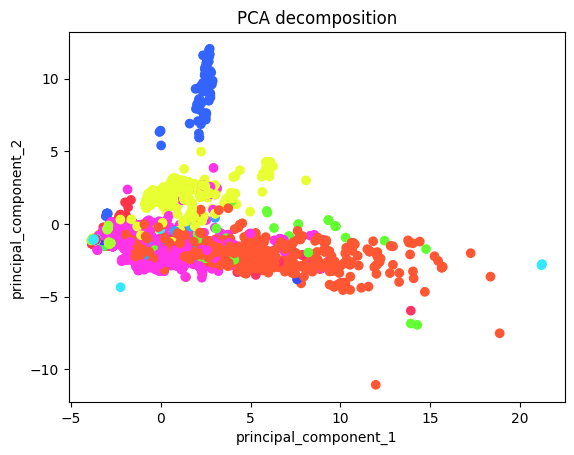

In [72]:
plt.scatter(new_df['principal_component_1'],new_df['principal_component_2'], color = new_df['result'])
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition')

In [16]:
pca_3 = PCA(n_components = 5).fit(X_scaled)#df[feature_col])
X_t = pca_3.transform(X_scaled)#df[feature_col])
df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'])

In [55]:
new_df = pd.concat([df_pca_3, df['result']], axis=1)
new_df.head()



,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,result
0,-2.394942,0.101610,0.732347,-2.176287,0.291676,qakbot
1,2.217474,-1.875531,1.385195,1.272920,3.838086,formbook
2,-1.942935,-1.043459,1.067217,1.588643,0.001866,formbook
3,2.284362,-1.906143,1.367468,1.251560,3.832181,formbook
4,7.817346,-4.087812,0.523245,-2.504317,-3.950529,agent_tesla


In [56]:

import plotly.express as px

fig = px.scatter_3d(new_df, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3', color='result')#.update_traces(marker = dict(color = "#C00000"))
fig.show()
#new_df.head()

In [57]:
new_df.head()

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,result
0,-2.394942,0.101610,0.732347,-2.176287,0.291676,qakbot
1,2.217474,-1.875531,1.385195,1.272920,3.838086,formbook
2,-1.942935,-1.043459,1.067217,1.588643,0.001866,formbook
3,2.284362,-1.906143,1.367468,1.251560,3.832181,formbook
4,7.817346,-4.087812,0.523245,-2.504317,-3.950529,agent_tesla


In [58]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train    = df_train.reset_index(drop=True)
df_val      = df_val.reset_index(drop=True)
df_test     = df_test.reset_index(drop=True)

y_train     = df_train[result_col]
y_test      = df_test[result_col]
y_val       = df_val[result_col]

df_train    = df_train[feature_col]
df_val      = df_val[feature_col]
df_test     = df_test[feature_col]

In [59]:
df_train.head().T

,0,1,2,3,4
appexception,15,0,0,15,0
apicall,91,4,41,4,47
codeinjection,17,0,8,0,0
dll-loaded,0,0,0,0,0
doc_summary,2,8,2,8,2
exploitcode,10,8,8,0,8
file,718,13,147,144,580
folder,17,4,6,22,14
heapspraying,0,0,5,0,0
hiddenproc,0,0,0,0,0


In [60]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

#depths = [1, 2, 3, 4, 5, 6, 7,8,9, 10, 15, 20, None]

#for depth in depths: 
dt = DecisionTreeClassifier(max_depth=10)#depth)
dt.fit(X_train, y_train)
#
y_pred = np.array( dt.predict_proba(X_val))[:,:,1]
#auc = roc_auc_score(y_val, y_pred.T)

#print('%4s -> %.3f' % (depth, auc))
#auc

In [61]:
#accuracy, precision, recall for each malvare
result_col

Index(['agent_tesla', 'carrotbat', 'icedid', 'asyncrat', 'ave_maria', 'emotet',
       'formbook', 'gozi', 'lokibot', 'nanocore', 'netsky', 'remcos', 'qakbot',
       'autoit'],
      dtype='object')

In [62]:
(y_val == (y_pred.T >= 0.95)).mean()

agent_tesla    0.995595
carrotbat      1.000000
icedid         1.000000
asyncrat       0.998532
ave_maria      0.997063
emotet         0.997797
formbook       0.982379
gozi           0.991924
lokibot        0.983847
nanocore       0.997063
netsky         0.994860
remcos         0.997063
qakbot         0.999266
autoit         0.998532
dtype: float64

In [63]:
y_val.shape
#0.6652943598235923
#0.7566273886332586
#0.8991497839286726
#0.9288893047280146
#0.9590771719678612
#0.9748426960842511
#0.9791450719641732
#0.981862589060953
#0.9838768229121448
#0.98462723640817


(1362, 14)

In [64]:
y_pred = dt.predict_proba(X_val)
y_numpy = np.array(y_pred)

In [65]:
y_numpy.shape

(14, 1362, 2)

In [66]:
y_numpy[:,0,1]

array([1.43369176e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.96415771e-01, 0.00000000e+00,
       1.43369176e-03, 7.16845878e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])